In [367]:
import matplotlib.pyplot as plt
import cv2 
import pytesseract
from PIL import Image
from reportlab.lib.pagesizes import A4, letter
# Adding custom options

custom_config = r'--oem 2 --psm 12 -l fra+eng'



In [368]:
A4_int = (int(round(A4[0])), int(round(A4[1])))

In [369]:
img = cv2.imread('img/test1.jpg',cv2.IMREAD_UNCHANGED)
img = cv2.imread('img/test3.png',cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (A4_int[0],A4_int[1]) ,interpolation=cv2.INTER_CUBIC)
img = cv2.resize(img, None,fx=2.5,fy=2.5 ,interpolation=cv2.INTER_CUBIC)

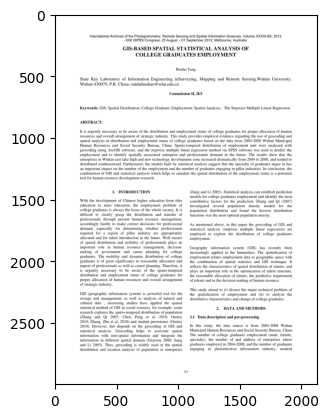

In [370]:
plt.imshow(img)

In [371]:
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [372]:
# test = pytesseract.image_to_string(Image.fromarray(img), config=custom_config)
# test

In [373]:
# Perform OCR on the RGB image using pytesseract
text = pytesseract.image_to_data(Image.fromarray(img),output_type='dict',config=custom_config)

In [374]:
boxes = len(text['level'])
for i in range(boxes ):
    (x, y, w, h) = (text['left'][i], text['top'][i], text['width'][i], text['height'][i])
    #Draw box        
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

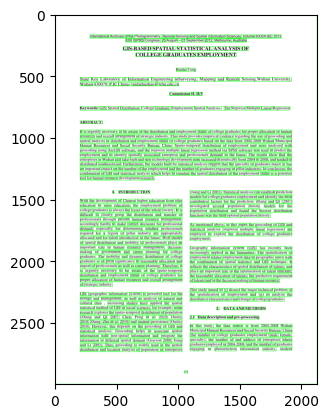

In [375]:
plt.imshow(img)

In [376]:
for i in range(boxes ):
    (x, y, w, h,chara) = (text['left'][i] , text['top'][i], text['width'][i], text['height'][i],text["text"][i])
    print(x, y, w, h,chara)

0 0 2125 2998 
283 168 1552 28 
283 168 1552 28 
283 168 1552 28 
283 169 155 21 International
447 168 109 22 Archives
565 168 24 22 of
596 169 39 21 the
645 168 216 28 Photogrammetry,
872 168 98 22 Remote
979 168 102 28 Sensing
1090 169 46 21 and
1147 168 84 27 Spatial
1243 168 140 22 Information
1392 168 121 25 Sciences,
1524 169 96 21 Volume
1628 168 135 25 XXXIX-B2,
1774 168 61 22 2012
572 200 981 28 
572 200 981 28 
572 200 981 28 
572 201 51 22 XXII
635 200 83 23 ISPRS
727 200 128 28 Congress,
866 201 30 22 25
905 201 89 27 August
1002 212 16 4 —
1026 201 27 22 01
1067 200 138 28 September
1214 201 69 24 2012,
1294 201 139 25 Melbourne,
1443 201 110 22 Australia
551 264 1022 31 
551 264 1022 31 
551 264 1022 31 
551 264 229 31 GIS-BASED
792 264 184 31 SPATIAL
988 264 286 31 STATISTICAL
1287 264 214 31 ANALYSIS
1514 264 59 31 OF
654 314 816 31 
654 314 816 31 
654 314 816 31 
654 314 209 31 COLLEGE
876 314 266 31 GRADUATES
1155 314 315 31 EMPLOYMENT
983 437 157 29 
983 437 157 29 

In [377]:
def adjust_text_boxes(text_data):
    # Zip the text data into tuples for easier manipulation
    boxes = list(zip([pos * A4[0] / img.shape[1] for pos in text_data['left']], 
                     [A4[1] - pos * A4[1]/img.shape[0] for pos in text_data['top']], 
                     text_data['width'],
                       text_data['height'],
                         text_data['text']))

    # Sort the text boxes based on their vertical positions (top to bottom)
    sorted_boxes = sorted(boxes, key=lambda box: box[1])

    # Set a threshold for height difference to identify text on the same line
    threshold_height = 16 * A4[1]/img.shape[0]  # Adjust this value as needed

    # Correct text boxes that are too close in height
    for i in range(len(sorted_boxes) - 1):
        current_box = sorted_boxes[i]
        next_box = sorted_boxes[i + 1]

        # If the vertical distance between the current and next box is within the threshold
        if abs(current_box[1] - next_box[1]) < threshold_height:
            # Adjust the next box's top position to align it with the current box
            new_top = current_box[1]
            sorted_boxes[i + 1] = (next_box[0], new_top, next_box[2], next_box[3], next_box[4])

    # Unzip the corrected data
    corrected_data = {
        'left': [box[0] for box in sorted_boxes],
        'top': [box[1] for box in sorted_boxes],
        'width': [box[2] for box in sorted_boxes],
        'height': [box[3] for box in sorted_boxes],
        'text': [box[4] for box in sorted_boxes]
    }

    return corrected_data

# Example usage:
# Assuming 'text' contains the extracted text data similar to what you previously retrieved from Tesseract
corrected_text_data = adjust_text_boxes(text)

In [379]:
from reportlab.pdfgen import canvas

def hello(c,left,top,text):
    c.drawString(left,top,text)
c = canvas.Canvas("hello.pdf")
boxes_correct = len(corrected_text_data["left"])
for i in range(boxes ):
    (x, y, w, h,chara) = (corrected_text_data['left'][i]  ,corrected_text_data['top'][i], corrected_text_data['width'][i], corrected_text_data['height'][i],corrected_text_data["text"][i])
    hello(c,x,y,chara)
c.showPage()
c.save()